In [1]:
import geopandas as gpd
import networkx as nx

In [54]:
gdf = gpd.read_file('../data/etecsa/havana_shape')

In [55]:
positions = {}
for idx, row in gdf.iterrows():
    zone_id = row['No_de_zona']
    centroid = row['geometry'].centroid
    positions[zone_id] = (centroid.x, centroid.y)

In [56]:
G = nx.Graph()

In [57]:
for idx, row in gdf.iterrows():
    zone_id = row['No_de_zona']
    G.add_node(zone_id, geometry=row['geometry'])

In [58]:
for i, row_i in gdf.iterrows():
    for j, row_j in gdf.iterrows():
        if i < j:  # Evitar duplicados y comparar solo una vez cada par
            # Utilizar touches() para determinar si comparten borde
            tolerance = 1e-8  # Ajustar este valor según la escala de los datos
            if row_i['geometry'].buffer(tolerance).intersects(row_j['geometry'].buffer(tolerance)):
                G.add_edge(row_i['No_de_zona'], row_j['No_de_zona'])

In [59]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 134
Número de aristas: 370


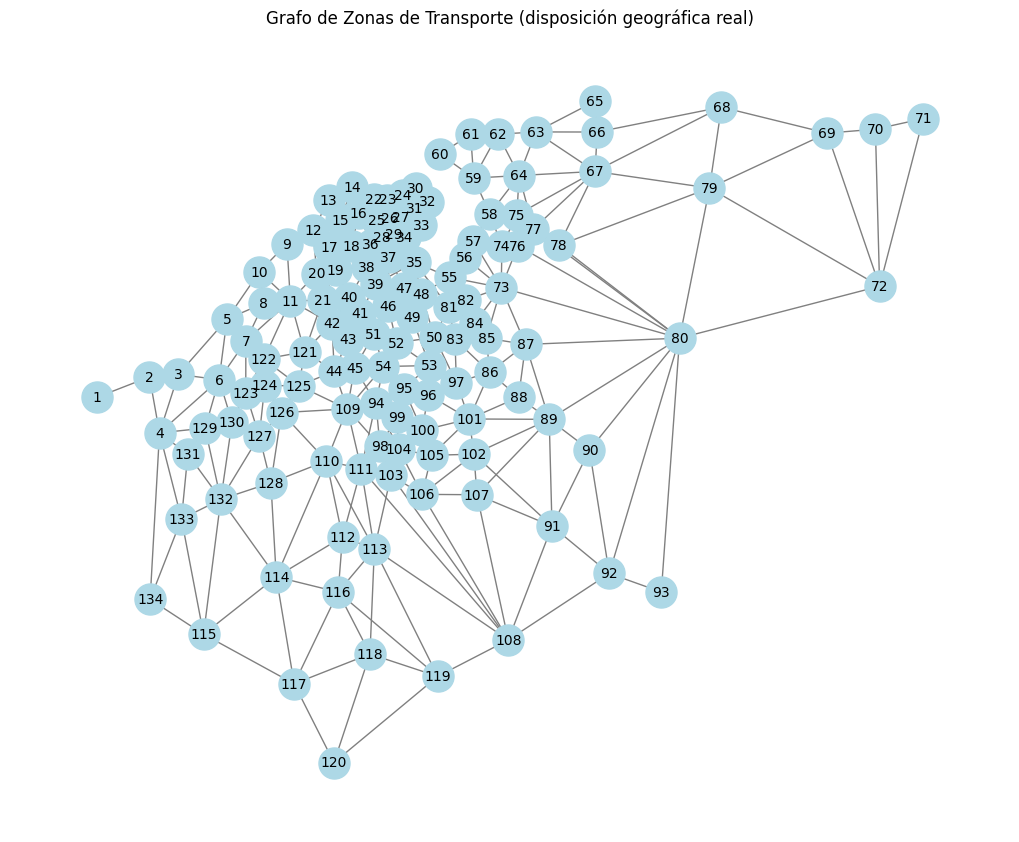

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Grafo de Zonas de Transporte (disposición geográfica real)")
plt.show()

In [67]:
import pandas as pd

# Suponiendo que G es el grafo previamente construido
# Calcular las distancias en aristas entre cada par de nodos
rows = []
for source in G.nodes():
    # nx.shortest_path_length devuelve un diccionario con las distancias desde 'source'
    lengths = nx.shortest_path_length(G, source=source)
    for target, distance in lengths.items():
        if source != target:
            rows.append({"origin": source, "destiny": target, "distance": distance})

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(rows)

In [68]:
df.to_csv("pairwise_distances.csv", index=False)